In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.




**Answer**: Number of multiplications required is **nxkxm**  multiplications and number of additions required is **nx(k-1)xm**.

Matrix multiplication indicates a row-by-column multiplication, where the entries in the ith row of A are multiplied by the corresponding entries in the jth column of B and then adding the results.

In matrix multiplication, first row of first matrix (nk) is multiplied with first column of second matrix(kp). As the number of elements in first row and first column of both matrices is k, the number of multiplications are k and additions are k-1 (to add k numbers we need k-1 add operators).
 
 So, for first row and first column, the multiplications are k and additions are k-1. We know that each row of first matrix is multiplied with each column of second matrix and as number of rows and coulumns in first and second matrices are n and p respectvely, the number of multiplications are nkp and additions are n(k-1)p.


2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
# iterative method
import time
# 3x3
A = [[2, 7, 3],
	[1, 5, 3],
	[8, 8, 9]]

# 3x4
B = [[1, 8, 1, 2],
	[0, 7, 3, 0],
	[1, 8, 9, 1]]

# 3x4 

def mul(A,B):
  res = [[0 for i in range(5)] for j in range(3)]
  for i in range(len(A)):
      for j in range(len(B)):
          for k in range(len(B[0])):
              res[i][k] += A[i][j] * B[j][k]
  return res

%timeit res = mul(A,B)




15.1 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [2]:
# using numpy array
import numpy as np
A = np.array([[2, 7, 3],
	[1, 5, 3],
	[8, 8, 9]])
B = np.array([[1, 8, 1, 2],
	[0, 7, 3, 0],
	[1, 8, 9, 1]])

%timeit result = np.matmul(A,B)

3.99 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Explanation**: 
NumPy uses a highly-optimized, carefully-tuned BLAS method for matrix multiplication.
Using numpy, matrix multiplication is taking less time as compared to general matrix multiplication.
Execution using numpy is faster than list of lists, the NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly.

3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time.?




**Answer**:
The median of an array is, If **odd**, then simply return the **mid value** of the array
Else, the median is the **average of the two middle values** in a sorted array. Or we can say (n//2)th largets element in the array. As, the array mentioned here is unsorted and 1st higehst element is discovered using 1 pass. so for , n//2 th  highest we would require atmost n//2 passes having n elements in each pass. So, time complexity in such case would be **O(n2)**.

**Better Approaches:**
**Approach 1**: sort the array and return the mid element.
time complexity = **O(nlogn)**
**Approach 2**: use quick select algorithm method: using Randomized QuickSelect  
Time Complexity: 
Best case analysis: O(1)
Average case analysis: **O(N)**
Worst case analysis: O(N2) // but this probablity is very less to occur as pivot selection is done using random selection algo.



In [23]:
# given approach:
import time
Li = [9,1,4,2,7,10,8]
start = time.time()
n=len(Li)
for i in range(n//2):
  maxm = max(Li)
  Li.remove(maxm)
if n%2==0:
  maxm1 = max(Li)
  Li.remove(maxm1)
  maxm2 = max(Li)
  Li.remove(maxm2)
  print((maxm1+maxm2)/2)
else:
  maxm = max(Li)
  print(maxm)
end = time.time()
print(end-start)

7
0.002351999282836914


In [22]:
# Better Approaches:
#approach 1:
import time
start = time.time()
li = [9,1,4,2,7,10,8]
li.sort()
mid = len(li) // 2
res = (li[mid] + li[~mid]) / 2
end = time.time()
print("Median of list is : " + str(res))
print(end-start)


Median of list is : 7.0
0.00019550323486328125


In [21]:

# numpy.median() method
import numpy as np

arr = [9,1,4,2,7,10,8]
start = time.time()	
# median 
print("\nmedian of arr, axis = None : ", np.median(arr))
end = time.time()
print(end-start)




median of arr, axis = None :  7.0
0.0028557777404785156


In [24]:
# Better Approaches:
#approach 2: using quick select  algorithm
import random
import time
start = time.time()

a, b = None, None;

# Returns the correct position of the pivot element
def Partition(arr, l, r) :

	lst = arr[r]; i = l; j = l;
	while (j < r) :
		if (arr[j] < lst) :
			arr[i], arr[j] = arr[j],arr[i];
			i += 1;
		
		j += 1;

	arr[i], arr[r] = arr[r],arr[i];
	return i;

# Picks a random pivot element between
# l and r and partitions arr[l..r]
# around the randomly picked element
# using partition()
def randomPartition(arr, l, r) :
	n = r - l + 1;
	pivot = random.randrange(1, 100) % n;
	arr[l + pivot], arr[r] = arr[r], arr[l + pivot];
	return Partition(arr, l, r);

# Utility function to find median
def MedianUtil(arr, l, r,
				k, a1, b1) :

	global a, b;
	
	# if l < r
	if (l <= r) :
		
		# Find the partition index
		partitionIndex = randomPartition(arr, l, r);
		
		# If partition index = k, then
		# we found the median of odd
		# number element in arr[]
		if (partitionIndex == k) :
			b = arr[partitionIndex];
			if (a1 != -1) :
				return;
				
		# If index = k - 1, then we get
		# a & b as middle element of
		# arr[]
		elif (partitionIndex == k - 1) :
			a = arr[partitionIndex];
			if (b1 != -1) :
				return;
				
		# If partitionIndex >= k then
		# find the index in first half
		# of the arr[]
		if (partitionIndex >= k) :
			return MedianUtil(arr, l, partitionIndex - 1, k, a, b);
			
		# If partitionIndex <= k then
		# find the index in second half
		# of the arr[]
		else :
			return MedianUtil(arr, partitionIndex + 1, r, k, a, b);
			
	return;

# Function to find Median
def findMedian(arr, n) :
	global a;
	global b;
	a = -1;
	b = -1;
	
	# If n is odd
	if (n % 2 == 1) :
		MedianUtil(arr, 0, n - 1, n // 2, a, b);
		ans = b;
		
	# If n is even
	else :
		MedianUtil(arr, 0, n - 1, n // 2, a, b);
		ans = (a + b) // 2;
		
	# Print the Median of arr[]
	print("Median = " ,ans);

arr = [9,1,4,2,7,10,8]
n = len(arr)
findMedian(arr, n)
end = time.time()
print(end-start)




Median =  7
0.0019598007202148438


**Conclusion** : 
1.given approach: 0.00235
2.sort:0.000195
3.quick select : 0.00195
4.numpy: 0.0028 
so best among these for this particuar test array in terms for time complexity is sorting one.

4.What is the gradient of the following function with respect to x and y?
  (x^2)y + (y^3)sin(x) 
Answer : 


$grad f(x,y)=[(2xy+y^3cos(x ),(x^2 + 3y^2sin(x))]$

5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [ ]:
import jax
import jax.numpy as jnp
def function(x,y):
  return ((x**2)*y+(y**3)*(jnp.sin(x)))
x=2.9
y=2.5
function_dx_dy = jax.grad(function,argnums=(0,1))(x,y)
print(function_dx_dy)


(DeviceArray(-0.67122173, dtype=float32, weak_type=True), DeviceArray(12.895924, dtype=float32, weak_type=True))


6.Use sympy to confirm that you obtain the same gradient analytically.

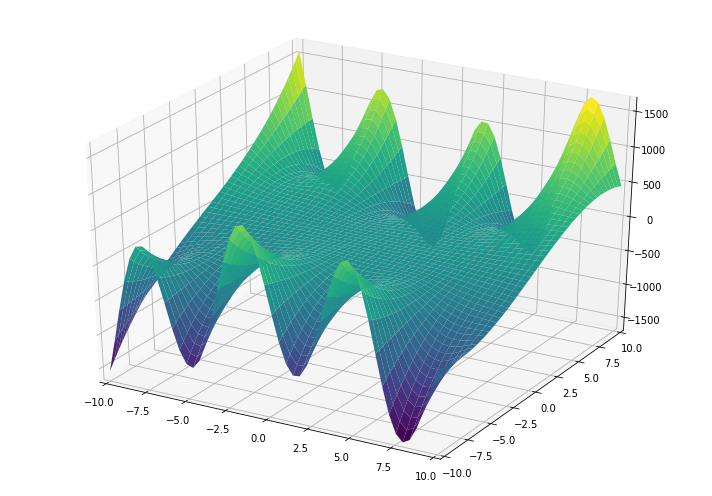

In [ ]:
import sympy
from sympy import*
import jax.numpy as jnp
x=symbols('x')
y=symbols('y')
cost=(x**2)*y+(y**3)*sin(x)
costx = diff(cost,x)
costy = diff(cost,y)
sympy.plotting.plot3d(cost, (x, -10, 10), (y, -10, 10),size=(10,7));
x=7.5
y=8.5



7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [25]:
nest_dict={2022:
           {'Branch 1':
            {'Roll_number':22210028,'Name':'Pinki','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210029,'Name':'Pooja','Marks':
             {'Maths':9,'English':8,'Physics':7}}}, 
            2023:{'Branch 1':
            {'Roll_number':22210036,'Name':'Krishna','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210031,'Name':'rohit','Marks':
             {'Maths':9,'English':8,'Physics':7}}},
           2024:{'Branch 1':
            {'Roll_number':22210033,'Name':'Krish','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210038,'Name':'prushottam','Marks':
             {'Maths':9,'English':8,'Physics':7}}},
           2025:{'Branch 1':
            {'Roll_number':22210021,'Name':'Kumari','Marks':
             {'Maths':10,'English':10,'Physics':10}},
            'Branch 2':
            {'Roll_number':22210020,'Name':'sai','Marks':
             {'Maths':9,'English':8,'Physics':7}}}
          }
print(nest_dict)

{2022: {'Branch 1': {'Roll_number': 22210028, 'Name': 'Pinki', 'Marks': {'Maths': 10, 'English': 10, 'Physics': 10}}, 'Branch 2': {'Roll_number': 22210029, 'Name': 'Pooja', 'Marks': {'Maths': 9, 'English': 8, 'Physics': 7}}}, 2023: {'Branch 1': {'Roll_number': 22210036, 'Name': 'Krishna', 'Marks': {'Maths': 10, 'English': 10, 'Physics': 10}}, 'Branch 2': {'Roll_number': 22210031, 'Name': 'rohit', 'Marks': {'Maths': 9, 'English': 8, 'Physics': 7}}}, 2024: {'Branch 1': {'Roll_number': 22210033, 'Name': 'Krish', 'Marks': {'Maths': 10, 'English': 10, 'Physics': 10}}, 'Branch 2': {'Roll_number': 22210038, 'Name': 'prushottam', 'Marks': {'Maths': 9, 'English': 8, 'Physics': 7}}}, 2025: {'Branch 1': {'Roll_number': 22210021, 'Name': 'Kumari', 'Marks': {'Maths': 10, 'English': 10, 'Physics': 10}}, 'Branch 2': {'Roll_number': 22210020, 'Name': 'sai', 'Marks': {'Maths': 9, 'English': 8, 'Physics': 7}}}}


8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [26]:
class Marks():
    def __init__(self,marks):
        self.math,self.english,self.physics=marks
class Students():
    def __init__(self,name,number,marks):
        self.name=name
        self.rollnumber=number
        self.marks=Marks(marks)
class Branches():
        def __init__(self,b):
            self.branch_name=b
            self.students=[]
            student_names=['Pinki','Kunmari']
            student_rollno=[22210028,22210021]
            student_marks=[[10,10,10],[10,10,10]]
            for i in range(len(student_names)):
                self.students.append(Students(student_names[i],student_rollno[i],student_marks[i]))
class Year():
    def __init__(self,year):
        self.year=year
        self.branches=[]
        for i in range(2):
            self.branches.append(Branches('Branch '+str(i+1)))
years=[Year(2022),Year(2023),Year(2024),Year(2025)]


9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



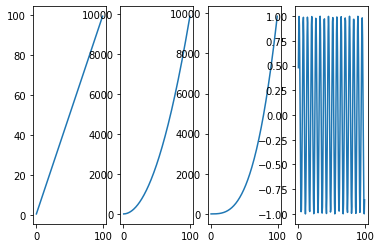

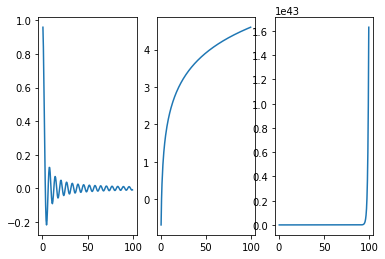

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0.5,100.0,0.5)
y1=x
y2=x*x
y3=(x**3)/100
y4=np.sin(x)
y5=np.sin(x)/x
y6=np.log(x)
y7=np.exp(x)
figure, axis = plt.subplots(1, 4)
axis[0].plot(x,y1)
axis[1].plot(x,y2)
axis[2].plot(x,y3)
axis[3].plot(x,y4)
figure,axis1=plt.subplots(1,3)
axis1[0].plot(x,y5)
axis1[1].plot(x,y6)
axis1[2].plot(x,y7)
plt.show()

10.Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [27]:
import pandas as pd
np.random.seed(42)
df=pd.DataFrame(np.random.uniform(1,2,[20,5]),columns=['a','b','c','d','e'])
df_std=df.std()
maxi_std=max(df_std)
for i,j in df_std.items():
    if j==maxi_std:
        column=i
#max standard deviation column
print('Max Standard Deviation column:',column,'and its value is:',maxi_std) 
df_mean=df.mean(axis=1)
min_mean=min(df_mean)
for i,j in df_mean.items():
    if j==min_mean:
        column=i
 #min mean row
print('Minimum mean row:',column,'and its value is:',min_mean)


Max Standard Deviation column: c and its value is: 0.31862833120007994
Minimum mean row: 11 and its value is: 1.3153814438335967


11.Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.


In [ ]:
df['f']= df.loc[:,['a','b','c','d','e']].sum(axis=1)
df['g']=np.where(df['f']>8,'GT8','LT8')
df['g'].value_counts()['LT8']
df_LT8=df.loc[df['g']=='LT8']
df_GT8=df.loc[df['g']=='GT8']
print('standard deviation of LT8 f column:',df_LT8['f'].std())
print('standard deviation of GT8 f column:',df_GT8['f'].std())


standard deviation of LT8 f column: 0.4025886500663061
standard deviation of GT8 f column: 0.7956146881961926


12.Write a small piece of code to explain broadcasting in numpy.

In [30]:
np.random.seed(42)
array=np.random.randint(5,size=6)
print('not done broadcasting')
print(array)
print('after doing broadcasting')
print(array+5)


not done broadcasting
[3 4 2 4 4 1]
after doing broadcasting
[8 9 7 9 9 6]


In the above example we can see that adding 5 to array is adding it each and every element in a. silmilarly it can be done between two arrays as well.


In [31]:
barray=np.random.randint(5,size=(2,3))
print('not done broadcasting')
print(barray)
print('after doing broadcasting')
print(barray+5)


not done broadcasting
[[2 2 2]
 [4 3 2]]
after doing broadcasting
[[7 7 7]
 [9 8 7]]


It also applies same for multi-dimensional arrays.



13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
np.random.seed(42)
def argmin(arr):
    mini=arr[0]
    for i in range(len(arr)):
        if arr[i]<=mini:
            mini=arr[i]
            index=i
    return index
arr=np.random.randint(50,size=20)
print(np.argmin(arr)==argmin(arr))
%timeit argmin(arr)
%timeit np.argmin(arr)


True
4.1 µs ± 80.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.02 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
